# Team 7
## Birds of a feather flock together

Data sets: FBI's National Incident-based Reporting System (NIBRS) for 2012 & 2020

2012 nibrs link - https://ucr.fbi.gov/nibrs/2012/data-tables
2020 nibrs link - https://crime-data-explorer.fr.cloud.gov/pages/explorer/crime/crime-trend

I think that our hypothesis will be proven true.

In [5]:
'''
Imports required libraries, numpy wasn't used (i think)

Dataframes are an object type provided by Pandas (pd) that is compatible with Seaborn (sb) and Numpy (np).
'''

import pandas as pd # used to convert excel file into a data structure we can manipulate (dataframes)
import numpy as np # used to make large scale computations efficiently
import seaborn as sb # provides additional plotting capabilities, compatible w/ Pandas & NumPy
from matplotlib import pyplot as plt # provides additional plotting functionalities, used as a base for pd/sb plotting 

# makes it so that graphed plot is shown directly below code cell
%matplotlib inline 

In [6]:
# reads excel files, creates a dataframe based on data read. Uses top row as labels for cols of the dataframe.
df_2012 = pd.read_excel("nibrs_2012_cleaned.xls")
df_2020 = pd.read_excel("nibrs_2020_cleaned.xls")

# Removes irrelevant columns, probably should've done it during cleaning process
df_2012.drop(['Population1'], axis=1, inplace=True)
df_2020.drop(['Population1'], axis=1, inplace=True)

In [7]:
'''
 Creates a new dataframe based on the previous two we created in the previous cell. Similar to SQL's "join" clause,
 we combine the dataframe on a value shared between both dataframes. (x,y) characters are appended to duplicate
 column names.
'''

df_merged = pd.merge(df_2012, df_2020, on=["Agency Name"])
df_merged # prints merged dataframe so we can see what happens

,Agency Name,Total\nOffenses_x,Crimes\nAgainst\nPersons_x,Crimes\nAgainst\nProperty_x,Crimes\nAgainst\nSociety_x,Total\nOffenses_y,Crimes\nAgainst\nPersons_y,Crimes\nAgainst\nProperty_y,Crimes\nAgainst\nSociety_y
0,Apache Junction,2693.0,611.0,1748.0,334.0,2169.0,449.0,1123.0,597
1,Gilbert,10166.0,1396.0,6610.0,2160.0,11263.0,2176.0,6048.0,3039
2,Gilbert,211.0,82.0,92.0,37.0,11263.0,2176.0,6048.0,3039
3,Alma,780.0,202.0,507.0,71.0,487.0,171.0,267.0,49
4,Alma,780.0,202.0,507.0,71.0,476.0,131.0,236.0,109
...,...,...,...,...,...,...,...,...,...
11855,Juneau,666.0,118.0,500.0,48.0,530.0,122.0,310.0,98
11856,Sauk,1265.0,134.0,925.0,206.0,921.0,131.0,513.0,277
11857,Vilas,374.0,55.0,257.0,62.0,498.0,55.0,196.0,247
11858,Oneida Tribal,350.0,64.0,191.0,95.0,481.0,51.0,197.0,233


##### Crimes against ... "x" represents data from 2012, "y" represents data from 2020 

In [12]:
'''
We create ANOTHER dataframe based on our merged values. I did this so that I can create a scatter matrix without 
affecting future graphs.
''' 
# Drops row values where (total number of offenses in 2012) < 2000.
# Nested df_merged (df_merged['Total\nOffenses_x']) call returns a LIST of all row values for that column, Total Offenses.
# Outer df_merged df_merged[df_merged ... ] call returns a LIST for row values that fit our condition
# .index Converts our list of column values into the index value where that value is located in our dataframe.
# Drop removes all index values in the provided list
df_offenses = df_merged.drop(df_merged[df_merged['Total\nOffenses_x'] < 2000].index) 

# same concept as earlier except we use the new df we created to check for 2020 values; inplace saves our changes.
df_offenses.drop(df_offenses[df_offenses['Total\nOffenses_y'] < 2000].index, inplace = True)

# plots our graph. figsize controls size of output 
pd.plotting.scatter_matrix(df_offenses, figsize=(20,20))

0         2693.0
1        10166.0
2          211.0
3          780.0
4          780.0
          ...   
11855      666.0
11856     1265.0
11857      374.0
11858      350.0
11859      134.0
Name: Total\nOffenses_x, Length: 11860, dtype: float64

In [ ]:
sb.set(rc={'figure.figsize': (15,30)}) # sets plotting size

# Same process as previous cell, except instead of saving the data into a dataframe, we use it as an input parameter "data"
sb.violinplot(x='Crimes\nAgainst\nPersons_x', y='Agency Name', data=df_merged.drop(df_merged[df_merged['Crimes\nAgainst\nPersons_x'] < 1250].index))

In [ ]:
sb.set(rc={'figure.figsize':(15,30)})
sb.violinplot(x='Crimes\nAgainst\nPersons_y', y='Agency Name', data=df_merged.drop(df_merged[df_merged['Crimes\nAgainst\nPersons_y'] < 1250].index))

In [ ]:
sb.set(rc={'figure.figsize':(15,30)})
sb.violinplot(x='Crimes\nAgainst\nProperty_x', y='Agency Name', data=df_merged.drop(df_merged[df_merged['Crimes\nAgainst\nProperty_x'] < 4000 ].index))

In [ ]:
sb.set(rc={'figure.figsize':(15,30)})
sb.violinplot(x='Crimes\nAgainst\nProperty_y', y='Agency Name', data=df_merged.drop(df_merged[df_merged['Crimes\nAgainst\nProperty_y'] < 4000].index))

In [ ]:
sb.set(rc={'figure.figsize':(15,30)})
sb.violinplot(x='Crimes\nAgainst\nSociety_x', y='Agency Name', data=df_merged.drop(df_merged[df_merged['Crimes\nAgainst\nSociety_x'] < 700].index))

In [ ]:
sb.set(rc={'figure.figsize':(15,30)})
sb.violinplot(x='Crimes\nAgainst\nSociety_y', y='Agency Name', data=df_merged.drop(df_merged[df_merged['Crimes\nAgainst\nSociety_y'] < 800].index))

We use the dataframe that has filtered out the number of total offenses less than a certain value so that we can get a better picture of what is going on in our histogram without having to deal with an extreme amount of skew.


array([[<AxesSubplot:title={'center':'Total\nOffenses_x'}>,
        <AxesSubplot:title={'center':'Crimes\nAgainst\nPersons_x'}>,
        <AxesSubplot:title={'center':'Crimes\nAgainst\nProperty_x'}>],
       [<AxesSubplot:title={'center':'Crimes\nAgainst\nSociety_x'}>,
        <AxesSubplot:title={'center':'Total\nOffenses_y'}>,
        <AxesSubplot:title={'center':'Crimes\nAgainst\nPersons_y'}>],
       [<AxesSubplot:title={'center':'Crimes\nAgainst\nProperty_y'}>,
        <AxesSubplot:title={'center':'Crimes\nAgainst\nSociety_y'}>,
        <AxesSubplot:>]], dtype=object)

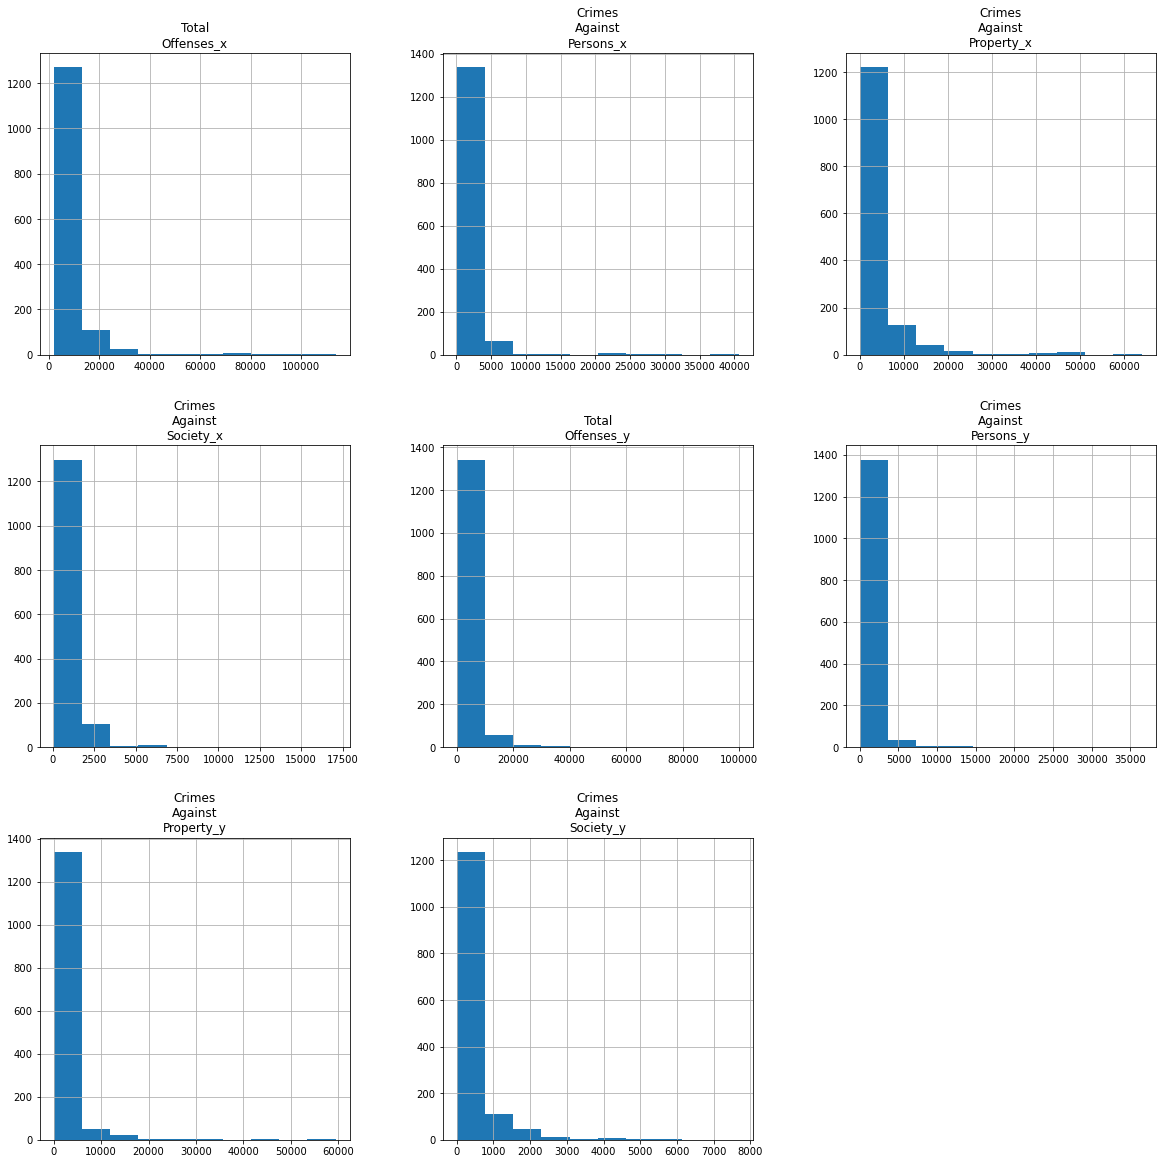

In [13]:
# reuse offenses df to print histogram, bins control # of columns used to categorize
df_offenses.hist(bins=10, figsize=(20,20))